# 01: Opening and understanding

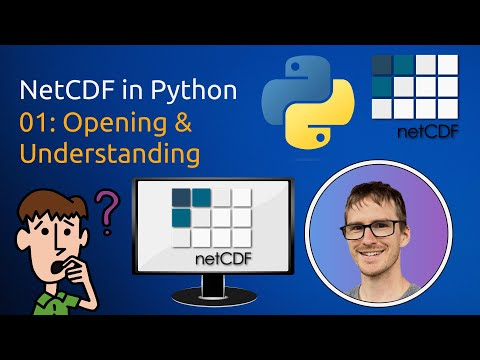

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('699jkjLJGyM')

In this notebook we will go through how to open a NetCDF file using Python. We will also try to understand the file and extract the data and metadata from it.

Firstly, let's import the modules that we will work with.

In [2]:
import xarray as xr # For working with NetCDF files as xarray objects

## Importing some data from OPeNDAP

Have you heard of OPeNDAP? Try running the cell below.

OPeNDAP, which stands for "Open-source Project for a Network Data Access Protocol," makes it easier to access and share scientific data over the internet. One advantage of using OPeNDAP is that you don't need to download the data to use them!

In [3]:
netcdf_file = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_P1_NLEG01-1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset>
Dimensions:        (PRES: 320)
Coordinates:
  * PRES           (PRES) float32 1.0 2.0 3.0 4.0 ... 317.0 318.0 319.0 320.0
Data variables: (12/33)
    PRES_QC        (PRES) float32 ...
    TEMP           (PRES) float32 ...
    PSAL           (PRES) float32 ...
    FLU2           (PRES) float32 ...
    CNDC           (PRES) float32 ...
    DENS           (PRES) float32 ...
    ...             ...
    OXYOCPVL-1_QC  (PRES) float32 ...
    SPAR_QC        (PRES) float32 ...
    PAR_QC         (PRES) float32 ...
    PSAL-2_QC      (PRES) float32 ...
    TEMP-2_QC      (PRES) float32 ...
    ATTNZS01_QC    (PRES) float32 ...
Attributes: (12/73)
    qc_manual:                       Recommendations for in-situ data Near Re...
    contact:                         datahjelp@hi.no
    distribution_statement:          These data are public and free of charge...
    naming_authority:                no.unis
    license:                         https://creativecommons.org/licenses/by/...
    data_assembly_center:            IMR
    ...                              ...
    station_name:                    P1 (NLEG01)
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    date_created:                    2022-08-08T12:44:34Z
    doi:                             10.21335/NMDC-2085836005-P1_NLEG01-1
    title:                           CTD_station_P1_NLEG01-1_-_Nansen_Legacy_...
    metadata_link:                   https://doi.org/10.21335/NMDC-2085836005...

Let's break down what we see above. 

A classic NetCDF file like this one can be broken down into 3 components - dimensions, variables and global attributes. The variables can be broken down into coordinate variables and data variables. Sometimes they are displayed separately like here, but if you open a NetCDF file using different software the coordinate variables and data variables might be displayed together.

We will now have a closer look at each of these components, starting at the bottom with attributes. 


## Global attributes

Let's look at the global attributes. These are the metadata that describe the file as a whole. Below you can access them into a python dictionary.

In [4]:
xrds.attrs

{'qc_manual': 'Recommendations for in-situ data Near Real Time Quality Control https://doi.org/10.13155/36230',
 'contact': 'datahjelp@hi.no',
 'distribution_statement': 'These data are public and free of charge. User assumes all risk for use of data. User must display citation in any publication or product using data. User must contact PI prior to any commercial use of data.',
 'naming_authority': 'no.unis',
 'license': 'https://creativecommons.org/licenses/by/4.0/ https://creativecommons.org/licenses/by/4.0/',
 'data_assembly_center': 'IMR',
 'update_interval': 'void',
 'area': 'Arctic Ocean',
 'author': '',
 'Conventions': 'CF-1.8, ACDD-1.3, OceanSITES Manual 1.4',
 'data_mode': 'M',
 'comment': 'Descending CTD profile',
 'history': 'Created at 2022-08-08T12:43:51Z using the xarray library in Python',
 'netcdf_version': 'netCDF-4 classic model',
 'quality_index': 'A',
 'quality_control_indicator': '0',
 'publisher_name': 'Elisabeth Jones',
 'publisher_email': 'datahjelp@imr.no',
 'w

Since the above is a dictionary, we can access a single attribute by calling the *key* or attribute name we are interested in.

In [5]:
xrds.attrs['Conventions']

'CF-1.8, ACDD-1.3, OceanSITES Manual 1.4'

*Conventions* is probably the most important global attribute because it tells you (and a machine) how to interpret the rest of the file. *CF-1.8* refers to version 1.8 of the CF conventions, which you can find here:

https://cfconventions.org/
https://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.html

The CF conventions are a set of standards that define how a NetCDF file should be structured. The document linked above is extensive, but the aim is to provide a standardised way to organise many different types of data. You don't need to read it all, but it should be your go-to place if you want to know how to structure or understand a CF-NetCDF file, or encode certain types of data.

However, the CF conventions are light on discovery metadata. Discovery metadata are metadata that can be used to find data. For example, when and where the data were collected and by whom, some keywords etc. So we also use the ACDD convention - The Attribute Convention for Data Discovery.

https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3

In most cases, if you want to find out what a global attribute means, you can visit the ACDD convention page above to find a description of the attribute. There are other conventions that someone might have included that you can also find online, but we recommend that you always follow the CF and ACDD conventions as a minimum when creating a NetCDF file.

The person who created this file should have read the relevant sections of these documents to make sure that the files comply with these conventions. There are also validators you can run your files by to make sure that you file is compliant with the conventions before you publish it. For example:

https://compliance.ioos.us/index.html

By following conventions, the data creator and user, human or machine, should be able to understand the data in the same way. A NetCDF file itself is not neccessarily FAIR because you could include any attributes or structure your data however you like. A CF-NetCDF file is FAIR.



## Dimensions:

To extract only the dimensions, you can do this:


In [6]:
xrds.dims

FrozenMappingWarningOnValuesAccess({'PRES': 320})

This NetCDF file has only 1 dimension, called *PRES*. 

The *PRES* dimension has 320 points. Dimensions tell you about the shape and size of your variables. In this case, we know that any variable with a dimension of only *PRES* will have 320 data points - though some could be NaN. 

A variable might also have 2 or more dimensions. For example, a variable with 2 dimensions, one with a size of 80 and a second with a size of 100, will be 2D array of 100 x 80 of values.

You can extract individual dimensions like this.

In [7]:
xrds.dims['PRES']

/tmp/ipykernel_12227/304843689.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  xrds.dims['PRES']


320

## Cordinates and Data variables:

Variables are where the data or coordinate values are stored. The coordinate variables usually have the same names as their respective dimensions. So to recap, a dimension tells you how many grid points there are, whilst the coordinate variable tells you the values for those grid points. To extract all the coordinate variables at once, we can do this:

In [8]:
xrds.coords

Coordinates:
  * PRES     (PRES) float32 1.0 2.0 3.0 4.0 5.0 ... 317.0 318.0 319.0 320.0

The name of the variable is given first.

The dimension (or dimensions) that the variable has is second in brackets. So a variable with 2 dimensions will contain a 2D grid of values, where the size of grid can be seen by looking at the dimensions. 

Third is the format that the values are stored in. float64 tells you the values are decimal places. There is a list of possible formats here:

The data variables can be extracted like this: 

In [9]:
xrds.data_vars

Data variables:
    PRES_QC        (PRES) float32 ...
    TEMP           (PRES) float32 ...
    PSAL           (PRES) float32 ...
    FLU2           (PRES) float32 ...
    CNDC           (PRES) float32 ...
    DENS           (PRES) float32 ...
    SVEL           (PRES) float32 ...
    CCOMD003       (PRES) float32 ...
    DOX1-1         (PRES) float32 ...
    DOX2-1         (PRES) float32 ...
    CNDC-2         (PRES) float32 ...
    OXYOCPVL-1     (PRES) float32 ...
    SPAR           (PRES) float32 ...
    PAR            (PRES) float32 ...
    PSAL-2         (PRES) float32 ...
    TEMP-2         (PRES) float32 ...
    ATTNZS01       (PRES) float32 ...
    TEMP_QC        (PRES) float32 ...
    PSAL_QC        (PRES) float32 ...
    FLU2_QC        (PRES) float32 ...
    CNDC_QC        (PRES) float32 ...
    DENS_QC        (PRES) float32 ...
    SVEL_QC        (PRES) float32 ...
    CCOMD003_QC    (PRES) float32 ...
    DOX1-1_QC      (PRES) float32 ...
    DOX2-1_QC      (PRES) float32 

To extract a single variable named *TEMP*:

In [10]:
xrds['TEMP']

<xarray.DataArray 'TEMP' (PRES: 320)>
[320 values with dtype=float32]
Coordinates:
  * PRES     (PRES) float32 1.0 2.0 3.0 4.0 5.0 ... 317.0 318.0 319.0 320.0
Attributes:
    standard_name:          sea_water_temperature
    long_name:              Sea temperature
    units:                  degrees_C
    valid_min:              -2.5
    valid_max:              40.0
    ancillary_variables:    TEMP_QC 
    data_mode:              D
    coverage_content_type:  physicalMeasurement

Above you can see not only the data values but also the *variable attributes*, which are the metadata describing that variable. 

To extract only the data values themselves:

In [11]:
xrds['TEMP'].values

array([3.735, 3.738, 3.739, 3.741, 3.736, 3.737, 3.736, 3.742, 3.736,
       3.738, 3.783, 3.833, 3.838, 3.837, 3.83 , 3.806, 3.792, 3.79 ,
       3.814, 3.846, 3.858, 3.833, 3.815, 3.817, 3.814, 3.812, 3.792,
       3.709, 3.704, 3.642, 3.582, 3.546, 3.512, 3.484, 3.368, 3.297,
       3.165, 3.106, 3.094, 3.094, 3.102, 3.079, 3.094, 3.076, 3.035,
       3.009, 2.992, 2.981, 2.954, 2.933, 2.903, 2.874, 2.85 , 2.824,
       2.801, 2.787, 2.764, 2.713, 2.711, 2.705, 2.701, 2.696, 2.682,
       2.665, 2.651, 2.647, 2.642, 2.635, 2.624, 2.588, 2.604, 2.608,
       2.593, 2.507, 2.472, 2.468, 2.46 , 2.453, 2.441, 2.43 , 2.431,
       2.43 , 2.431, 2.433, 2.43 , 2.417, 2.394, 2.382, 2.361, 2.335,
       2.32 , 2.303, 2.275, 2.267, 2.263, 2.277, 2.27 , 2.265, 2.262,
       2.256, 2.241, 2.216, 2.201, 2.191, 2.176, 2.135, 2.11 , 2.091,
       2.071, 2.064, 2.103, 2.106, 2.099, 2.095, 2.092, 2.088, 2.082,
       2.085, 2.093, 2.09 , 2.089, 2.085, 2.054, 2.022, 2.019, 2.021,
       2.026, 2.027,

Or alternatively, just the attributes

In [12]:
xrds['TEMP'].attrs

{'standard_name': 'sea_water_temperature',
 'long_name': 'Sea temperature',
 'units': 'degrees_C',
 'valid_min': -2.5,
 'valid_max': 40.0,
 'ancillary_variables': 'TEMP_QC ',
 'data_mode': 'D',
 'coverage_content_type': 'physicalMeasurement'}

The attributes are retrieved as a dictionary, so it is possible to access a single attribute by calling the *key* or attribute name.

In [13]:
xrds['TEMP'].attrs['standard_name']

'sea_water_temperature'

The variable name *TEMP* is not standardised. It could mean temporary, it could mean temperature. The temperature of air? The sea? The ground? Some other object? Fortunately, the *standard_name* variable attribute is standardised. You can find *sea_water_temperature* in the list of CF standard names here. 
https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

You can read the description and see what the canonical units should be. The data in the file doesn't need to be stored with the same units, but should be stored with units that are physically equivalent. For example, in this case the units *degrees_C* are physically equivalent to *K*. 

## Citing data

Remember, if you use a scientific dataset in a publication you should cite it in the same way you cite a paper - in the list of references. You can also include a statement in the data availability statement, but this should be as well as citing the dataset in the list of references. 

This is the recommended citation for the data used in this tutorial:

Elizabeth Jones (2022) CTD data from Nansen Legacy Cruise - Joint cruise 2-1 Staion: P1_NLEG01-1 https://doi.org/10.21335/NMDC-2085836005-P1_NLEG01-1
